In [1]:
import matplotlib.pyplot as plt
#import tensorrt
import tensorflow.keras as keras
import numpy as np
import pandas as pd

2023-07-06 11:44:01.637149: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
%%script echo skip
from tensorflow.keras import mixed_precision
mixed_precision.Policy('mixed_float16')

skip


In [3]:
(Xtrain, ytrain), (Xtest, ytest) = keras.datasets.mnist.load_data()

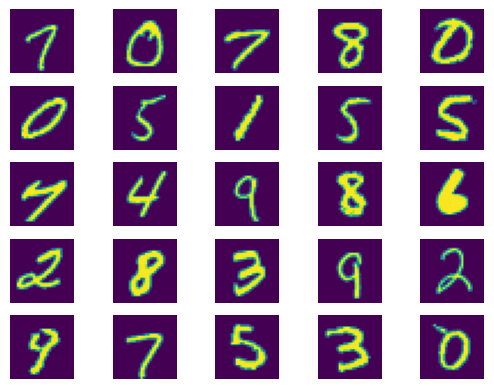

In [4]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(Xtrain[np.random.randint(0,len(Xtrain))])
    plt.axis('off')

In [5]:
Xtrain[0].shape

(28, 28)

In [6]:
keras.backend.clear_session()

model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=(28, 28)))

model.add(keras.layers.Dense(units=16,
                           activation=keras.activations.relu,
                            name='hidden_layer'))

model.add(keras.layers.Dense(units=10,
                            activation=keras.activations.softmax,
                            name='output_layer'))


model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'],
             #jit_compile=True
             )

In [7]:
fit = model.fit(Xtrain,
                keras.utils.to_categorical(ytrain),
                epochs = 200,
                batch_size = 256,
                validation_split=0.2
                )

Epoch 1/200
188/188 [==============================] - 1s 2ms/step - loss: 4.8192 - accuracy: 0.1627 - val_loss: 2.0612 - val_accuracy: 0.2338
Epoch 2/200
188/188 [==============================] - 0s 1ms/step - loss: 1.8871 - accuracy: 0.2931 - val_loss: 1.7281 - val_accuracy: 0.3287
Epoch 3/200
188/188 [==============================] - 0s 1ms/step - loss: 1.6715 - accuracy: 0.3452 - val_loss: 1.5828 - val_accuracy: 0.3666
Epoch 4/200
188/188 [==============================] - 0s 1ms/step - loss: 1.5660 - accuracy: 0.3648 - val_loss: 1.5280 - val_accuracy: 0.3725
Epoch 5/200
188/188 [==============================] - 0s 1ms/step - loss: 1.4898 - accuracy: 0.3851 - val_loss: 1.4895 - val_accuracy: 0.4137
Epoch 6/200
188/188 [==============================] - 0s 1ms/step - loss: 1.4053 - accuracy: 0.4252 - val_loss: 1.3741 - val_accuracy: 0.4316
Epoch 7/200
188/188 [==============================] - 0s 1ms/step - loss: 1.3202 - accuracy: 0.4677 - val_loss: 1.3178 - val_accuracy: 0.4792

Text(0.5, 0, 'epochs')

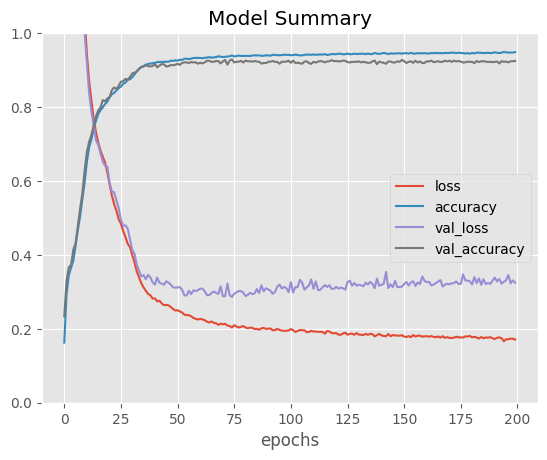

In [8]:
plt.style.use('ggplot')
pd.DataFrame(fit.history).plot()
plt.ylim([0,1])
plt.title("Model Summary")
plt.xlabel("epochs")

In [14]:
n = np.random.randint(0,len(Xtrain))
print(n)
model.predict(Xtrain[n:n+1]).round(2)[0],ytrain[n:n+1][0]

56446
1/1 [==============================] - 0s 15ms/step


(array([0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.99, 0.  , 0.  , 0.  ],
       dtype=float32),
 6)